# Exploratory Data Analysis Using Python

**Referencia**:[Swaathi Kakarla](https://www.activestate.com/blog/exploratory-data-analysis-using-python/)

Exploratory Data Analysis, or EDA, is essentially a type of storytelling for statisticians. 

It allows us to `uncover patterns and insights`, often with visual methods, within data. EDA is often the __first step of the data modelling process__. In this phase, data engineers have some questions in hand and try to validate those questions by performing EDA.

As this article shows, you can use Python to do an EDA at any point in the Machine Learning (ML) process: 



Source:[sharpsightlabs.com](https://www.sharpsightlabs.com/blog/data-analysis-machine-learning-example-1/)

For the purpose of this tutorial, we will be using a CSV file containing the sale prices of houses and their attributes.

## Loading a Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from numpy import mean
from numpy import std
from numpy import percentile
 
url = '..\\..\\..\\data\\EDA-Activestate-Blog.csv'
df = pd.read_csv(url, sep=",")

In [2]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# A quick look at the dataset
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## Exploring A Dataset

A quick look at the dataset can be done by calling on the Pandas “info” method, like so:

This shows us the number of non-null cells for each column. It is obvious from this data that the columns, MiscFeature (54), Fence (281), PoolQC (7), FireplaceQu(770), and Alley (91) are not relevant to building a model as they are present in far fewer quantities.

All these columns can be dropped.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

## Distributions

The data describes *House Sale Prices* against *House Attributes*. In order for the data model to learn accurately, we need to train it with data that does not have too many outliers. Testing data should ideally be a narrow representation of a single problem.

To visualize the distribution of the sale price:

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


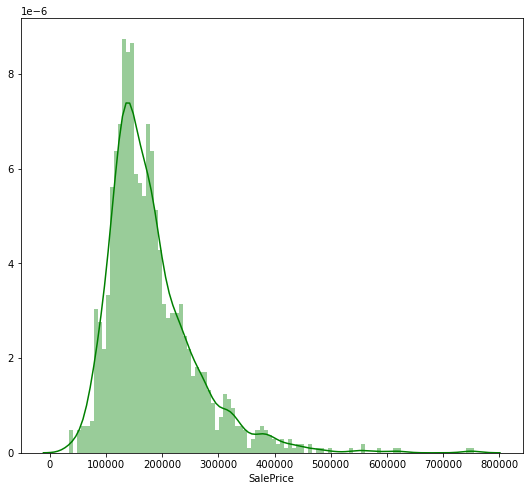

In [5]:
# Sale Price Distribution
print(df['SalePrice'].describe())

plt.figure(figsize=(9, 8))
sns.distplot(df['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});
# plt.savefig('sale-price-dist.png')

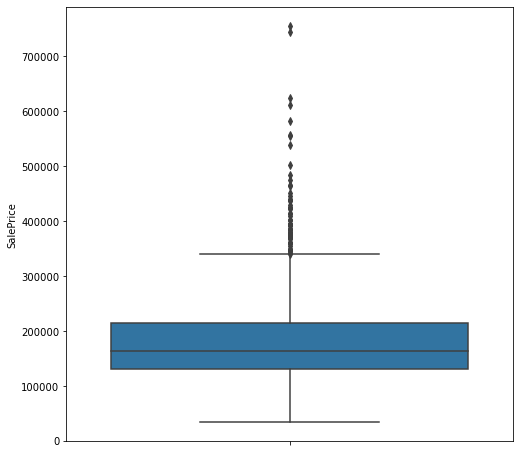

In [6]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x=df['SalePrice'], orient="v")

From the above graph we can see that there are very few outliers. Before moving on to the model-building phase, they will be removed.

Now, let us build similar distributions for the other columns and see the relationship they have to sale price.

To extract all integer columns:

## Dealing with Outliers

### Standard Deviation Method

In [7]:
df_copy = df.copy()

anomalies = []

# Funcion ejemplo para detección de outliers
def find_anomalies(data):
    # Set upper and lower limit to 2 standard deviation
    data_std = data.std()
    data_mean = data.mean()
    
    print('Standar Deviation : %.2f' % data_std)
    print('Mean : %.2f' % data_mean)
    
    anomaly_cut_off = data_std * 2
    lower_limit  = data_mean - anomaly_cut_off 
    upper_limit = data_mean + anomaly_cut_off
    
    print('Lower Limit : %.2f' % lower_limit)
    print('Upper Limit : %.2f' % upper_limit)

    # Generate outliers
    for index, row in data.iterrows():
        outlier = row ## obtener primer columna
        # print(outlier)
        if (outlier.iloc[0] > upper_limit.iloc[0]) or (outlier.iloc[0] < lower_limit.iloc[0]):
            anomalies.append(index)
    return anomalies

anomalies = find_anomalies(df_copy.set_index('Id')[['SalePrice']])
print('Anomalies : %.f' % len(anomalies))
print(anomalies[0:5])

Standar Deviation : 79442.50
Mean : 180921.20
Lower Limit : 22036.19
Upper Limit : 339806.20
Anomalies : 63
[12, 54, 59, 113, 152]


In [8]:
# remove outlies using INDEX VALUE:
df_copy.drop(anomalies, inplace=True)

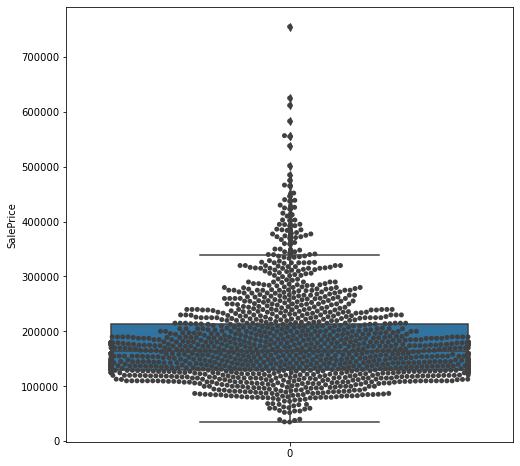

In [9]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x=df_copy['SalePrice'], orient="v")
ax = sns.swarmplot(data=df_copy['SalePrice'], color=".25")

count      1397.000000
mean     180787.690050
std       78328.248096
min       34900.000000
25%      130000.000000
50%      163500.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


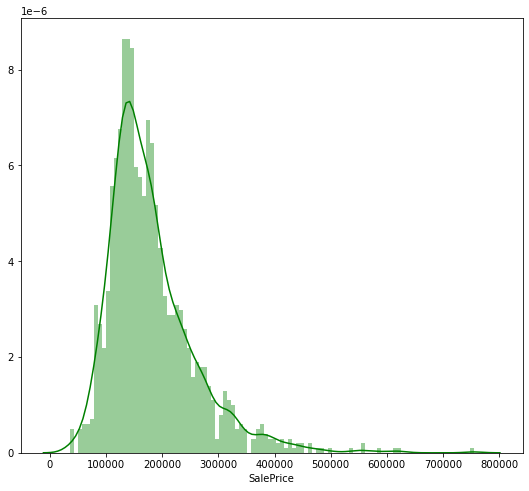

In [10]:
# Sale Price Distribution
print(df_copy['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_copy['SalePrice'], color='g', bins=100, hist_kws={'alpha': 0.4});

# plt.savefig('sale-price-dist.png')

### Standard Deviation Method

In [11]:
data = df.copy()

# calculate summary statistics
data_mean, data_std = mean(data['SalePrice']), std(data['SalePrice'])

# identify outliers
cut_off = data_std * 2
lower = data_mean - cut_off 
upper = data_mean + cut_off

In [12]:
# identify outliers
# Outliers as those examples that fall outside of the defined lower and upper limits.

outliers = [x for x in data['SalePrice'] if x < lower or x > upper]

# identify outliers
print('Standar Deviation : %.2f' % data_std)
print('Mean : %.2f' % data_mean)
print('Lower Limit : %.2f' % lower)
print('Upper Limit : %.2f' % upper)
print('Identified outliers: %d' % len(outliers))
print(outliers[0:5])

Standar Deviation : 79415.29
Mean : 180921.20
Lower Limit : 22090.61
Upper Limit : 339751.78
Identified outliers: 63
[345000, 385000, 438780, 383970, 372402]


Non-outlier observations: 1397


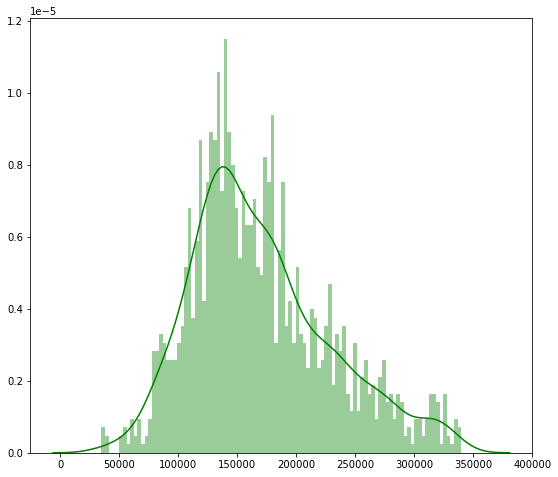

In [13]:
# remove outliers
# filter out those values from the sample that are not within the defined limits.

outliers_removed = [x for x in data['SalePrice'] if x < lower or x < upper]
print('Non-outlier observations: %d' % len(outliers_removed))

# Sale Price Distribution
plt.figure(figsize=(9, 8))
sns.distplot(outliers_removed, color='g', bins=100, hist_kws={'alpha': 0.4});

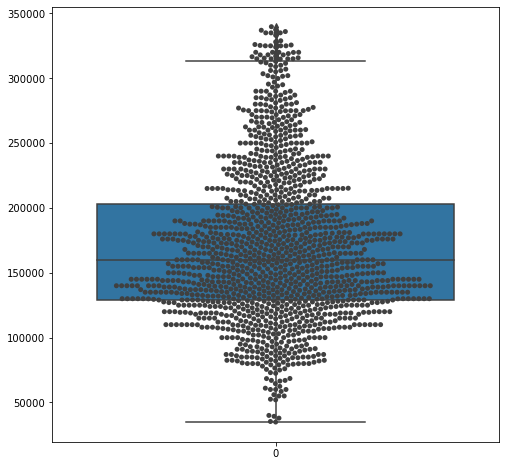

In [14]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x=outliers_removed, orient="v")
ax = sns.swarmplot(data=outliers_removed, color=".25")

### Interquartile Range Method

In [15]:
from numpy import percentile

data = df.copy()

# calculate interquartile range
q25, q75 = percentile(data['SalePrice'], 25), percentile(data['SalePrice'], 75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

# calculate the outlier cutoff
cut_off = iqr * 2
lower, upper = q25 - cut_off, q75 + cut_off
print('Percentiles: lower=%.3f, upper=%.3f, cut_off=%.3f' % (lower, upper, cut_off))

# identify outliers
outliers = [x for x in data['SalePrice'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

# remove outliers
outliers_removed = [x for x in data['SalePrice'] if x >= lower and x <= upper]
print('Non-outlier observations: %d' % len(outliers_removed))


Percentiles: 25th=129975.000, 75th=214000.000, IQR=84025.000
Percentiles: lower=-38075.000, upper=382050.000, cut_off=168050.000
Identified outliers: 38
Non-outlier observations: 1422


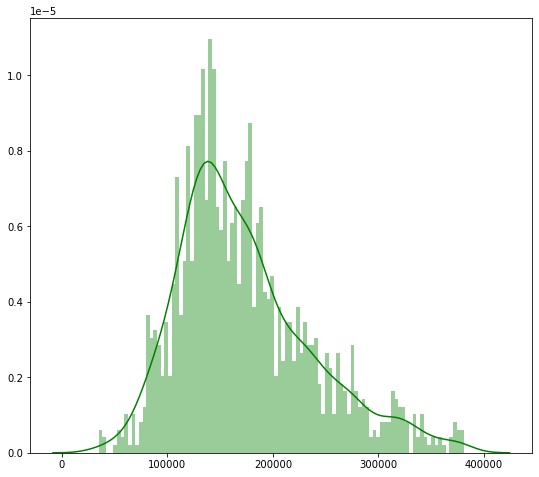

In [16]:
# Sale Price Distribution
plt.figure(figsize=(9, 8))
sns.distplot(outliers_removed, color='g', bins=100, hist_kws={'alpha': 0.4});

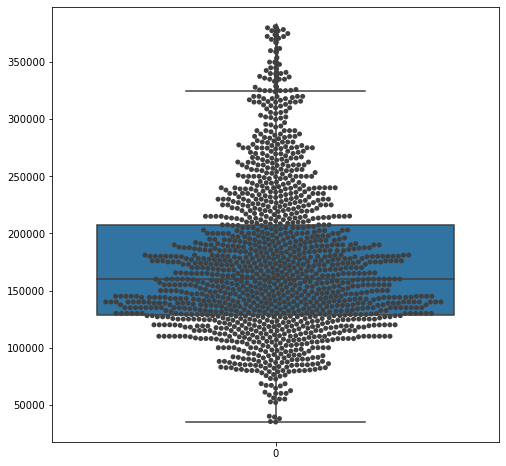

In [17]:
plt.figure(figsize=(8, 8))
ax = sns.boxplot(x=outliers_removed, orient="v")
ax = sns.swarmplot(data=outliers_removed, color=".25")

### Other Numerical attribute outliers

In [18]:
# Integer Distributions
df_num = df.select_dtypes(include = ['float64', 'int64'])
#df_num = df.select_dtypes(include = ['float64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


<Figure size 648x576 with 0 Axes>

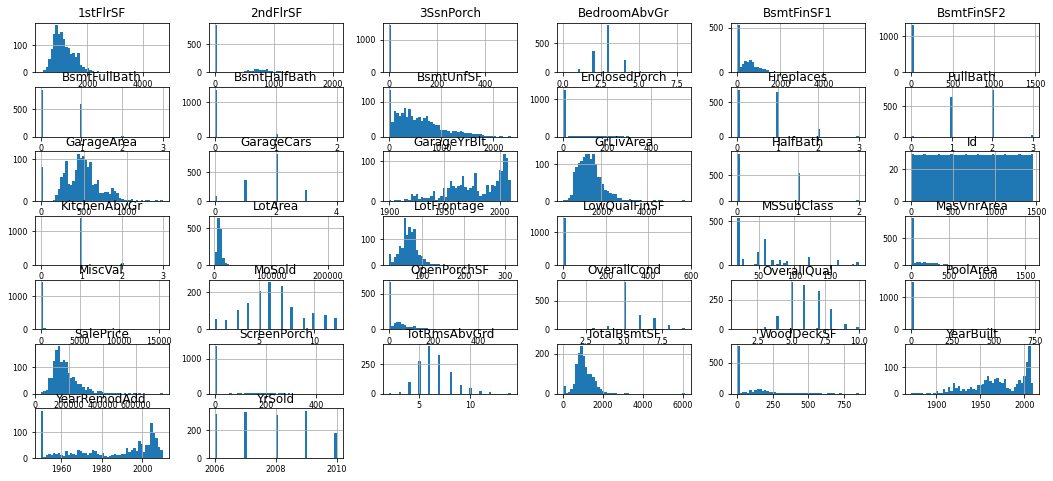

In [19]:
# plot all columns
plt.figure(figsize=(9, 8))
df_num.hist(figsize=(18, 8), bins=50, xlabelsize=8, ylabelsize=8);

# plt.savefig('int-column-dist.png')

From the above figure, `1stFlrSF`, `TotalBsmtSF`, `LotFrontage`, `GrLiveArea` share a similar distribution to the `SalePrice` distribution. The next step is to uncover correlations between the Xs (house attributes) and the Y (sale price).

Remember folks, correlation is not causation!

## Correlations

To find those features that have a strong correlation with SalePrice, let’s perform the following

In [20]:
# Correlations
df_num_corr = df_num.corr()['SalePrice'][:-1]
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)

print("There are {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

There are 10 strongly correlated values with SalePrice:
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64


Perfect! We now know there is a strong correlation between these values. This validates the entire dataset, and the effort spent by ML/AI engineers in the next phase should be fruitful.

Now, what about correlations of all the other attributes? It would be too hard to interpret feature-to-feature relationships using distributions. Let’s use a heatmap for this.

## Feature To Feature Relationships

To plot a heatmap between these features, let’s perform the following:

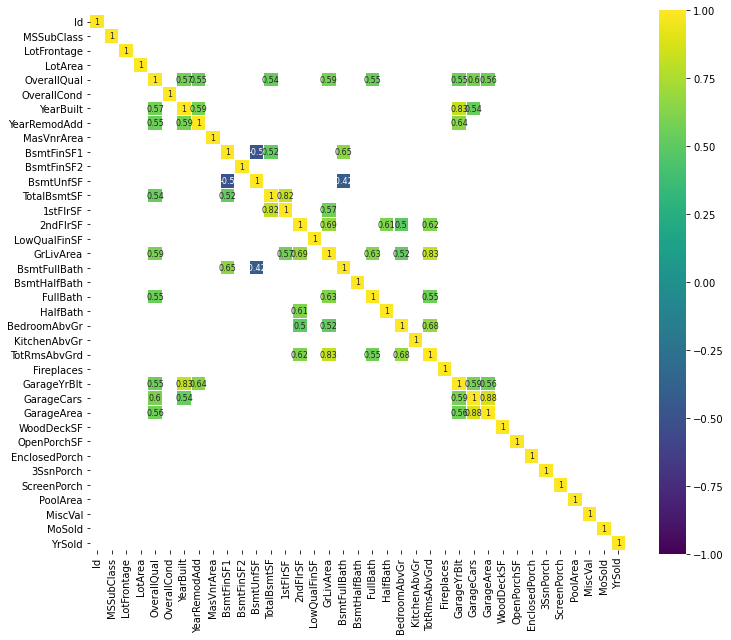

In [21]:
# Heatmap
corr = df_num.drop('SalePrice', axis=1).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)],
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

# plt.savefig('heatmap.png')

There are a lot of interesting relationships between the features:

- The HalfBath/2ndFlrSF relationship indicates that people give importance to having a half bath on the second floor.
- 1stFlrSF/TotalBsmtSF relationship indicates that the bigger the first floor is, the larger the basement is.

These relationships help us to reconfigure the dataset by removing columns that mean the same thing. This allows us to work with a smaller set of variations, leading to a theoretically higher accuracy.

## Conclusion

An ML or AI model can improve significantly if it is pruned and manipulated in the right way. Developers should focus much more time on performing an EDA and then cleaning up the data in order to make building the ML/AI model much easier and more efficient.